# Proposed Hypothesis: Minimum Wage does not increase in proportion to GDP growth

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plot

### Function to return data for individual country

In [15]:
# Simple function to return the data corresponding to a particular country in oecd dataframe
def get_country_data(data_frame, country: str):
    return data_frame[data_frame['Country Code'] == country]

## Importing first data set - GDP from OECD

In [16]:
gdp_df = pd.read_csv("datasets/GDP_Selected_2000_2020_OECD.csv")
gdp_df.drop(columns = ["INDICATOR", "MEASURE", "FREQUENCY", "SUBJECT", "Flag Codes"], inplace = True)
gdp_df["Value"] = gdp_df["Value"].div(1000)
gdp_df.columns = ["Country Code", "Year", "GDP"]
gdp_df.head()

,Country Code,Year,GDP
0,AUS,2000,28.252630
1,AUS,2001,29.493215
2,AUS,2002,30.740963
3,AUS,2003,32.248256
4,AUS,2004,33.865907


## Importing second data set - Minimum Wage Data from OECD

In [17]:
MinWage_df = pd.read_csv("datasets/RealMinimumWages.csv")
MinWage_df.drop(MinWage_df.loc[MinWage_df['Pay period']=='Hourly'].index, inplace=True)
MinWage_df.drop(MinWage_df.loc[MinWage_df['SERIES']=='EXR'].index, inplace=True)
MinWage_df.drop(columns=["SERIES", "Series", "PERIOD", "TIME", "Unit Code", "Pay period"], inplace = True)
MinWage_df.drop(columns=["Unit", "PowerCode Code", "Reference Period", "Flag Codes", "Flags"], inplace=True)
MinWage_df.drop(columns=["Reference Period Code", "PowerCode"], inplace=True)
MinWage_df["Value"] = MinWage_df["Value"].div(1000)
MinWage_df.columns = ["Country Code", "Country", "Year", "Real Min. Wage"]
MinWage_df[MinWage_df['Country Code'] == 'AUS'].head()

,Country Code,Country,Year,Real Min. Wage
1137,AUS,Australia,2001,21.503436
1138,AUS,Australia,2002,21.715267
1139,AUS,Australia,2003,21.998608
1140,AUS,Australia,2004,22.384714
1141,AUS,Australia,2005,22.566220


In [18]:
# Create 
oecd_countryCodes = MinWage_df['Country Code'].unique() # Find Unique categories in data
oecd_countries = MinWage_df['Country'].unique() # Find Unique categories in data

In [19]:
combined_df = pd.merge(MinWage_df, gdp_df, how="inner", on = ["Country Code", "Year"])
combined_df[combined_df['Country Code'] == 'RUS']

,Country Code,Country,Year,Real Min. Wage,GDP
497,RUS,Russian Federation,2001,0.538840,7.898523
498,RUS,Russian Federation,2002,0.744584,8.623997
499,RUS,Russian Federation,2003,0.798377,9.940233
500,RUS,Russian Federation,2004,0.886130,10.984497
501,RUS,Russian Federation,2005,0.969864,12.698299
502,RUS,Russian Federation,2006,1.314586,16.017124
503,RUS,Russian Federation,2007,2.521557,17.881759
504,RUS,Russian Federation,2008,2.209745,21.657589
505,RUS,Russian Federation,2009,3.726094,20.826598
506,RUS,Russian Federation,2010,3.487239,22.008299


## Trial Plot

In [20]:
plot.plot(combined_df['Year'], combined_df['GDP'], combined_df['Year'], combined_df['Real Min. Wage'])
plot.legend(['GDP', 'Wage'])

In [21]:
# Trial Plot of USA
def plot_country(country: str):
    plot_df = get_country_data(combined_df, country)
    plot.plot(plot_df['Year'], plot_df['GDP'], plot_df['Year'], plot_df['Real Min. Wage'])
    plot.legend(['GDP', 'Wage'])
plot_country('GBR')

# Mean and Growth Rate

The resulting trial plot was far too cluttered. This revealed that there would be too many individual plots. Different metrics will therefore be compared. The average minimum wage for all OECD countries for each year will be plooted alongside the Average gdp for all OECD countries for each year. Secondly, the growth rates of gdp and minimum wage for each country, over the period 2001 - 2019, will be compared. 

## Calculating the Mean GDP and Mean Real Min. Wage Per year

In [22]:
combined_df[combined_df['Year'] == 2001].mean()

Year              2001.000000
Real Min. Wage      10.609397
GDP                 20.168350
dtype: float64

In [23]:
years = []
MeanMinWage =[]
MeanGDP = []
for year in range(2001, 2019):
    # Find mean for the year
    temp = combined_df[combined_df['Year'] == year].mean(skipna=True) # Missing values ignored
    years.append(year)
    MeanGDP.append(temp['GDP'])
    MeanMinWage.append(temp['Real Min. Wage'])
# Create dict to create data frame
Mean_Data = {'Year' : years , 'Mean GDP' : MeanGDP , 'Mean Min. Wage' : MeanMinWage}
# Create Pandas Data frame
mean_df = pd.DataFrame(Mean_Data)
mean_df.head()

,Year,Mean GDP,Mean Min. Wage
0,2001,20.168350,10.609397
1,2002,21.168173,10.812154
2,2003,21.894542,10.994967
3,2004,23.229010,11.263630
4,2005,24.501410,11.480728


## Trial Plot of Means

In [26]:
fig = plot.figure(figsize=(24, 6))

ax = fig.add_subplot(121)
ax.plot(mean_df['Year'], mean_df['Mean GDP'], mean_df['Year'], mean_df['Mean Min. Wage'])
ax.legend(['Mean GDP', 'Mean Min. Wage'])
ax.set_ylim(0)
ax.xaxis.set_ticks(ticks=(mean_df['Year']))
plot.xlabel("Year", fontsize=14)
plot.ylabel("Current US Dollars", fontsize=14)
#plot.show()

TypeError: 'Figure' object is not callable

## Finding Growth Rate 2001 - 2018

Growth rate is calculated simply for each country as: (GDP(2018) - GDP(2001)) / (GDP(2001)

In [12]:
# Create empty arrays to append values to
countries = []
gdp_growth = []
min_wage_growth = []
for country in oecd_countryCodes:
    # Isolate by country
    temp = combined_df[combined_df['Country Code'] == country]
    countries.append(temp['Country'])
    # isolate data for 2001
    temp2001 = temp[temp['Year'] == 2001]
    # isolate data for 2019
    temp2018 = temp[temp['Year'] == 2018]  
    # Find growth rate of GDP - If value is missing append 0.00 instead
    try:
        gdp_calc = (temp2018['GDP'].item() - temp2001['GDP'].item()) / temp2001['GDP'].item()
        gdp_growth.append(gdp_calc * 100) # Mulitply by 100%
    except ValueError:
        gdp_growth.append(0.00)
    # Find growth of Real Min. Wage - If value is missing append 0.00 instead
    try:
        min_wage_calc = ((temp2018['Real Min. Wage'].item()) - (temp2001['Real Min. Wage'].item())) / (temp2001['Real Min. Wage'].item())
        min_wage_growth.append(min_wage_calc * 100) # Multiply by 100%
    except ValueError:
        min_wage_growth.append(0.00)
# Create dict. to turn into DataFrame
data = {'Country Code' : oecd_countryCodes , 'Country' : oecd_countries , 'GDP Growth %' : gdp_growth , 'Real Min. Wage Growth %' : min_wage_growth}
# Creating data frame
growth_df = pd.DataFrame(data)
growth_df.drop(labels = [25, 27], inplace = True) # Drop Germany - Only data availiable is 2015 - 2019
growth_df.head()

,Country Code,Country,GDP Growth %,Real Min. Wage Growth %
0,IRL,Ireland,160.973255,28.586901
1,LUX,Luxembourg,108.548865,14.417049
2,PRT,Portugal,78.831553,29.025113
3,USA,United States,69.927758,-0.732049
4,EST,Estonia,253.720066,187.706964


Text(0, 0.5, '% Growth')

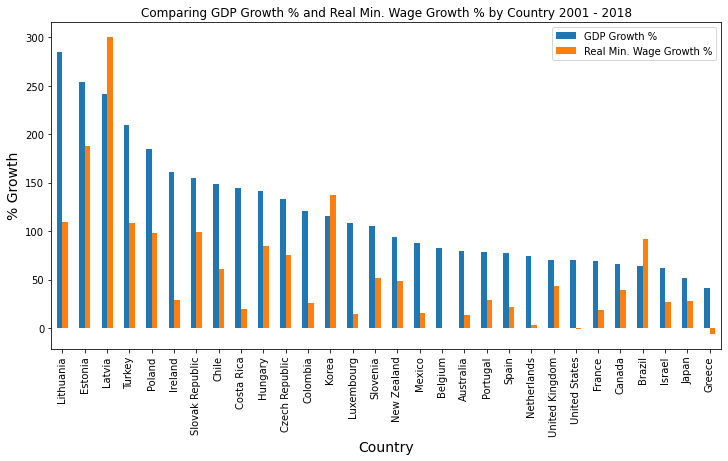

In [13]:
#sort from highest to lowest in terms of GDP
growth_df.sort_values(by='GDP Growth %', inplace=True, ascending=False)
plot = growth_df.plot.bar(x = 'Country', rot=0, figsize = (12,6))
plot.tick_params(axis='x', labelrotation = 90)
plot.set_title('Comparing GDP Growth % and Real Min. Wage Growth % by Country 2001 - 2018')
plot.set_xlabel('Country', fontsize=14)
plot.set_ylabel('% Growth', fontsize=14)

In [14]:
# Pearson's Correlation Coefficient and Spearman's Rank Correlation
pearson = growth_df['GDP Growth %'].corr(growth_df['Real Min. Wage Growth %'])
spearman = growth_df['GDP Growth %'].corr(growth_df['Real Min. Wage Growth %'], method = 'spearman')

print('Correlation results between GDP Value and Cost of Living Index:')
print(f'Pearson\'s Correlation Coefficient:\t {pearson}')
print(f'Spearman\'s Rank Correlation:\t\t {spearman}')

Correlation results between GDP Value and Cost of Living Index:
Pearson's Correlation Coefficient:	 0.7355424135021186
Spearman's Rank Correlation:		 0.6315906562847609
